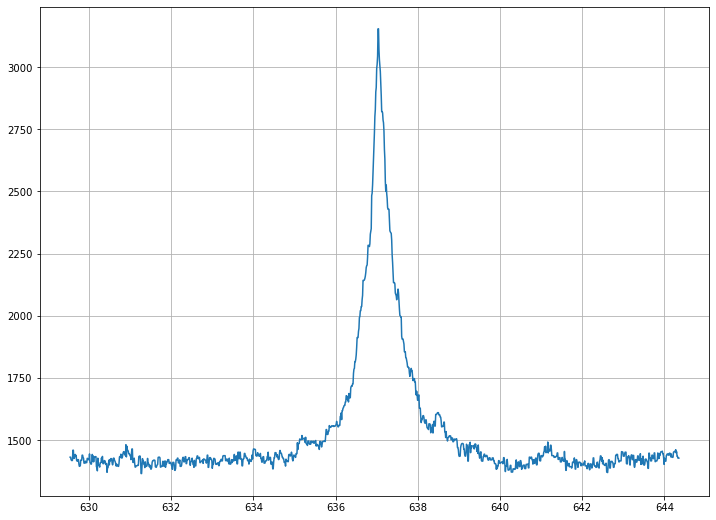

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from lmfit.models import QuadraticModel, LorentzianModel
import math
import uncertainties as unc

def findarg(data, value):
    arg = 0
    for wl in data:
        if wl<value:
            arg = arg + 1
        else:
            return arg
        
    return arg



data98 = pd.read_csv('98-m3-6-nv-60s.csv')
regionMin = 634
regionMax = 640

argMin = findarg(data98['W'], regionMin)
argMax = findarg(data98['W'], regionMax)

plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data98['W'],data98['I'])


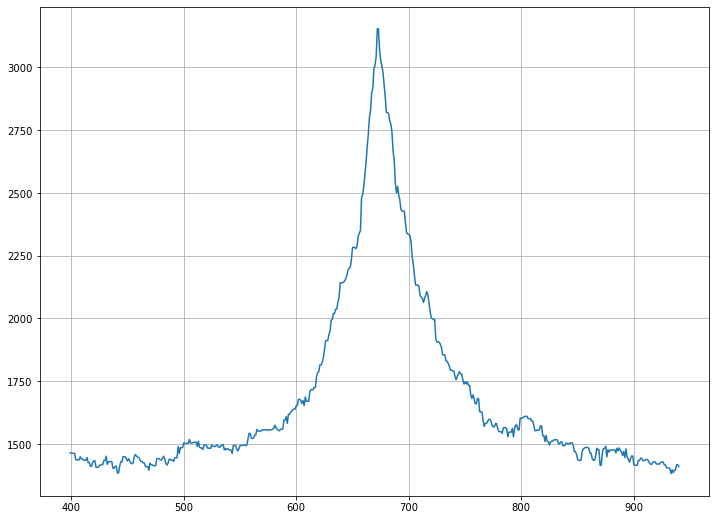

In [2]:
plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data98['I'][argMin:argMax])

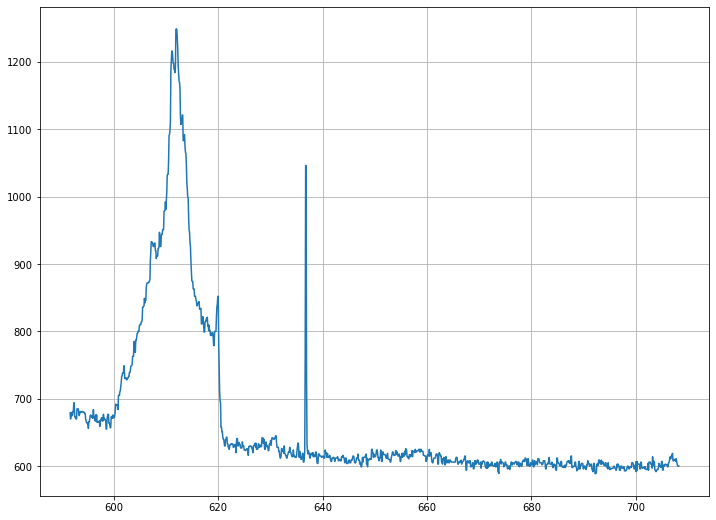

In [3]:
data1 = pd.read_csv('single_nv.csv')

argMin = findarg(data1['W'], regionMin)
argMax = findarg(data1['W'], regionMax)

plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data1['W'],data1['I'])


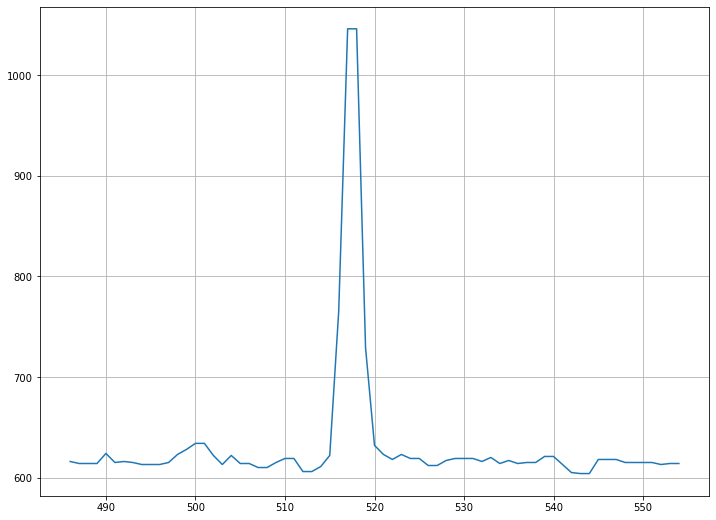

In [4]:
plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data1['I'][argMin:argMax])

# single NV spectra

[[Model]]
    (Model(parabolic) + Model(lorentzian, prefix='p1_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 92
    # data points      = 300
    # variables        = 5
    chi-square         = 21.7164981
    reduced chi-square = 0.07361525
    Akaike info crit   = -777.713066
    Bayesian info crit = -759.194154
    R-squared          = 0.99994761
[[Variables]]
    a:             0 (fixed)
    b:             0.29077372 +/- 0.05404257 (18.59%) (init = 0)
    c:             425.022894 +/- 35.0616152 (8.25%) (init = 0)
    p1_amplitude:  124.655708 +/- 2.00909643 (1.61%) (init = 88)
    p1_center:     636.803805 +/- 8.3266e-04 (0.00%) (init = 637)
    p1_sigma:      0.05800957 +/- 0.00260280 (4.49%) (init = 0.0015)
    p1_fwhm:       0.11601915 +/- 0.00520560 (4.49%) == '2.0000000*p1_sigma'
    p1_height:     684.010297 +/- 26.5818898 (3.89%) == '0.3183099*p1_amplitude/max(1e-15, p1_sigma)'


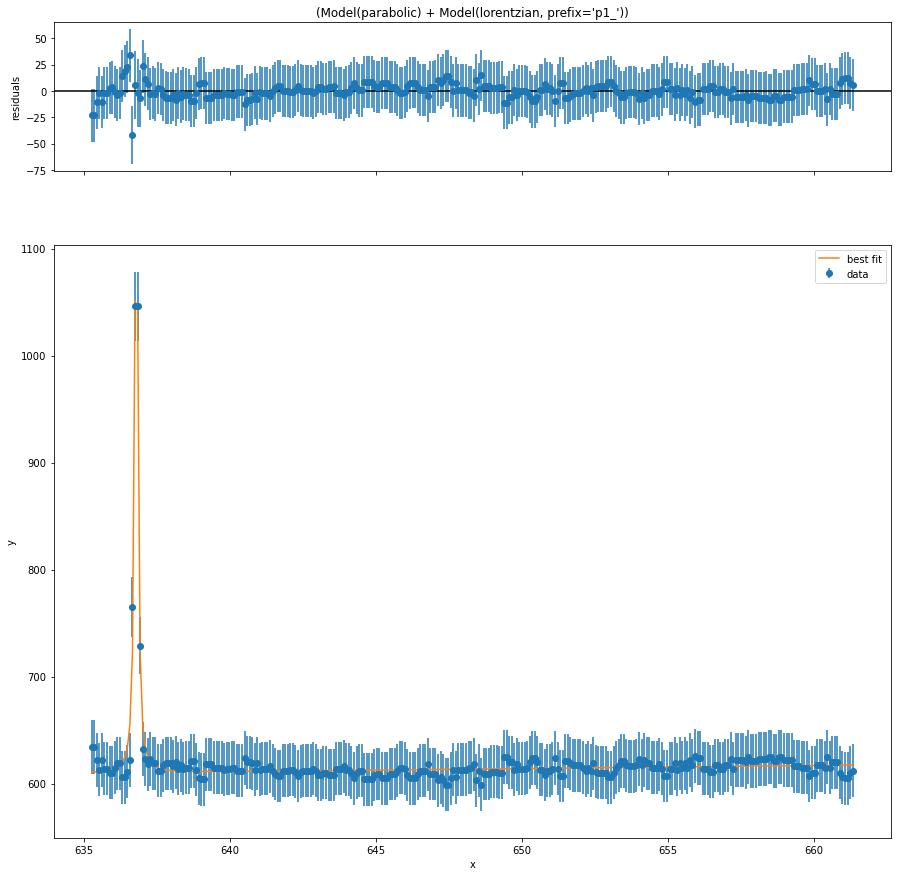

In [5]:
Index = list(range(500,800))
# create an instance of the model
# Note use of prefixes to keep parameters separate
model1 = QuadraticModel() + LorentzianModel(prefix='p1_')
model = model1
params = model.make_params()

params['p1_center'].set(value=637, vary=True)
params['p1_amplitude'].set(value=88, min=0, vary=True)
params['p1_sigma'].set(value=0.0015, vary=True)

params['a'].set(value=0, vary=False)
params['b'].set(value=0, vary=True)
params['c'].set(value=0, vary=True)

result_single = model.fit(data1['I'][Index], params, x=data1['W'], weights=1/np.sqrt(data1['I'][Index]))

print(result_single.fit_report(show_correl=False))

myfig=plt.figure(figsize=(15,15))
result_single.plot(fig=myfig);

# NV ensemble spectra

[[Model]]
    (Model(parabolic) + Model(lorentzian, prefix='p1_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 79
    # data points      = 550
    # variables        = 5
    chi-square         = 1355170.32
    reduced chi-square = 2486.55105
    Akaike info crit   = 4305.23568
    Bayesian info crit = 4326.78528
    R-squared          = 0.98233159
[[Variables]]
    a:             0 (fixed)
    b:             4.60843172 +/- 1.22457896 (26.57%) (init = 0)
    c:            -1512.73734 +/- 780.113227 (51.57%) (init = 0)
    p1_amplitude:  1669.20656 +/- 16.6280616 (1.00%) (init = 8800)
    p1_center:     637.072446 +/- 0.00245347 (0.00%) (init = 637)
    p1_sigma:      0.36190155 +/- 0.00421531 (1.16%) (init = 0.0015)
    p1_fwhm:       0.72380309 +/- 0.00843062 (1.16%) == '2.0000000*p1_sigma'
    p1_height:     1468.14784 +/- 9.88733517 (0.67%) == '0.3183099*p1_amplitude/max(1e-15, p1_sigma)'


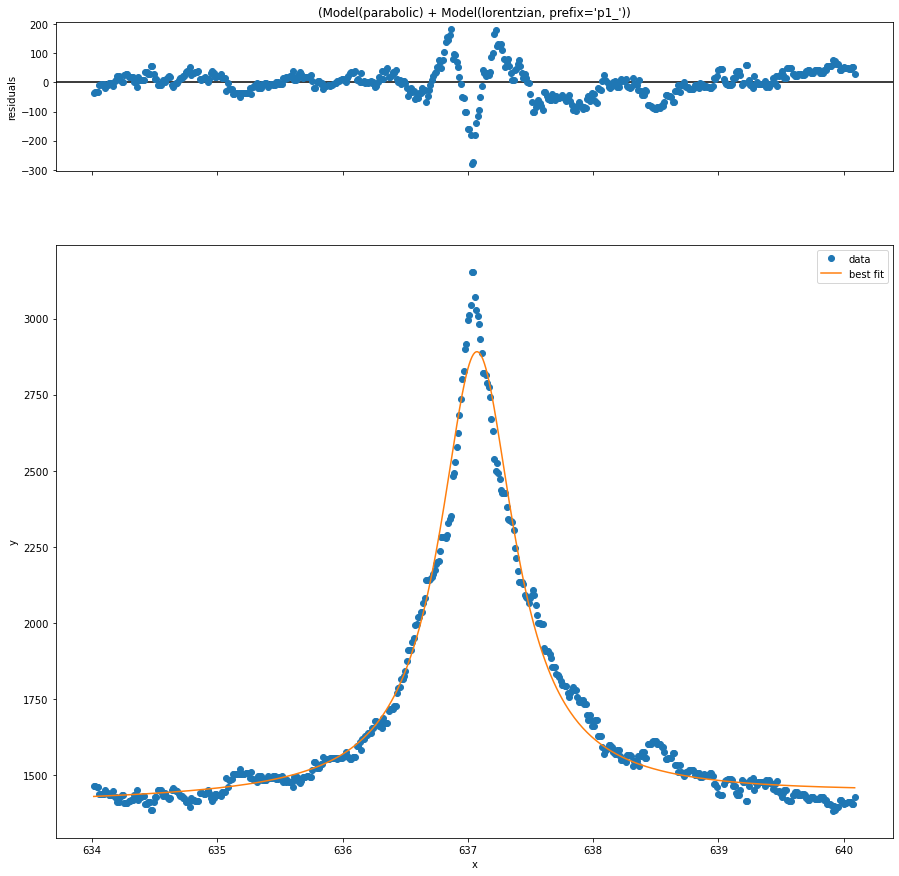

In [6]:
Index = list(range(400,950))
# create an instance of the model
# Note use of prefixes to keep parameters separate
model1 = QuadraticModel() + LorentzianModel(prefix='p1_')
model = model1
params = model.make_params()

params['p1_center'].set(value=637, vary=True)
params['p1_amplitude'].set(value=8800, min=0, vary=True)
params['p1_sigma'].set(value=0.0015, vary=True)

params['a'].set(value=0, vary=False)
params['b'].set(value=0, vary=True)
params['c'].set(value=0, vary=True)

result_ensemble = model.fit(data98['I'][Index], params, x=data98['W'])

print(result_ensemble.fit_report(show_correl=False))

myfig=plt.figure(figsize=(15,15))
result_ensemble.plot(fig=myfig);

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


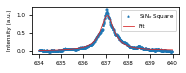

In [16]:
scale1 = 1.5

Index = list(range(400,940))
fit_x = np.linspace(634,640,2000)
fitline1 = result_single.eval(result_single.params, x = fit_x)

fitline_98 = result_ensemble.eval(result_ensemble.params, x = fit_x)

 
argMin = findarg(data1['W'], 634)
argMax = findarg(data1['W'], 640)


plt.rcParams.update({'font.size': 5.67})
cm = 1/2.54 
fig = plt.figure(figsize=(6.5*cm, 2.5*cm))
# plt.grid()
# plt.title('NV Spectra')
# plt.xlabel(r'Wavelength (nm)')
plt.ylabel(r'Intensity (a.u.)')
# plot the data with errorbars, and to see the errorbars, we multiply it by 100
plt.plot(data98['W'][Index], (data98['I'][Index]-1400)/1500,'^C0',markersize = 1.5, label='SiN$_x$ Square')

plt.plot(fit_x, (fitline_98-1400)/1500, '-C3',linewidth = 0.8,  label='Fit')
plt.legend()

plt.tight_layout()

fig.savefig('nv example.eps', format= 'eps',transparent=True)

In [8]:
data1['W'][400]

626.5635425238568

In [9]:
data98['W'][400]

634.0139438239667